
## 1.5. Data Description
The datasets used for this project were downloaded from [Driven Data]("https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/). The original data source is the [National 2009 H1N1 Flu Survey (NHFS)](https://webarchive.loc.gov/all/20140511165905/http://www.cdc.gov/nchs/nis/data_files_h1n1.htm) and it contains information on the social,economic and demographic backgrounds of the respondents as well as their opinions on the H1N1 and seasonal flu vaccines. The datasets have been divided into the training set features and the training set labels. The training data has 26707 rows and 36 columns. The information contained with the columns is as follows as described by the data [dictionary](https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/):

|No.| Column    | Description|
|---| ---       | ---         |
|1| `respondent_id` | Unique and random identifier for the respondents|
|2|`h1n1_concern`| Level of concern about H1N1 flu with 0 being not concerned at all and 3 being very concerned|
|3|`h1n1_knowledge`| Level of knowledge about H1N1 with 0 being no knowledge and 2 being a lot of knowledge|
|4|`behavioral_antiviral_meds`| Has taken any antiviral medication (0-no,1-yes)|
|5|`behavioral_avoidance`| Has avoided close contact with anyone with flu-like symptoms (0-no,1-yes)|
|6|`behavioral_face_mask`| Has bought a face mask (0-no,1-yes)|
|7|`behavioral_wash_hands`| Has frequently washed hands or used hand sanitizer (0-no,1-yes)|
|8|`behavioral_large_gatherings`| Has reduced time at large gatherings (0-no,1-yes)|
|9|`behavioral_outside_home`| Has reduced contact with people outside of own household (0-no,1-yes)|
|10|`behavioral_touch_face`| Has avoided touching eyes, nose or mouth (0-no,1-yes)|
|11|`doctor_recc_h1n1`| H1N1 flu vaccine was recommended by doctor (0-no,1-yes)|
|12|`doctor_recc_seasonal`| H1N1 flu vaccine was recommended by doctor (0-no,1-yes)|
|13|`chronic_med_condition`| Has any of the following chronic conditions: asthma or any lung condition, a heart condition, a kidney condition, sickle cell anaemia or any other anaemia, a neurological or neouromuscular condition, a liver condition, or a weakened immune system as a result of a chronic illness or medicines taken for a chronic illness (0-no,1-yes)|
|14|`child_under_6_months`| Has regular close contact with a child under the age of six months (0-no,1-yes)|
|15|`health_worker`| Is a healthcare worker (0-no,1-yes)|
|16|`health_insurance`| Has health insurance (0-no,1-yes)|
|17|`opinion_h1n1_vacc_effective`| Respondent's opinion on the efficacy of the vaccine with 1 being not at all effective and 5 being very effective|
|18|`opinion_h1n1_risk`| Respondent's opinion about risk of getting sick with H1N1 flu without vaccine with 1 being very low and 5 being very high|
|19|`opinion_h1n1_sick_from_vacc`| Respondent's worry of getting sick from H1N1 vaccine with 1 being not worried at all and 5 being very worried|
|20|`opinion_seas_vacc_effective`| Respondent's opinion about seasonal flu vaccine effectiveness with 1 being not effective at all and 5 being very effective|
|21|`opinion_seas_risk`| Respondent's opinion about risk of getting sick with seasonal flu without vaccine with 1 being very low and 5 being very high|
|22|`opinion_seas_sick_from_vacc`| Respondent's worry of getting sick from taking seasonal flu vaccine with 1 being not worried at all and 5 being very worried|
|23|`age_group`| Age group of respondents|
|24|`education`| Self-reported educational level|
|25|`race`| Race of respondent|
|26|`sex`| Sex of respondent|
|27|`income_poverty`| Household annual income of respondent with respect to 2008 Census poverty thresholds|
|28|`marital status`| Marital status of respondent|
|29|`rent_or_own`| Housing situation of respondent|
|30|`employment_status`| Employment status of respondent|
|31|`hhs_geo_region`| Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings|
|32|`census_msa`| Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census|
|33|`household_adults`| Number of *other* adults in the household, top-coded to 3|
|34|`household_children`| Number of children in the household, top-coded to 3|
|35|`employment_industry`| Type of industry respondent is employed in. Values are represented as short random character strings|
|36|`employment_occupation`| Type of occupation of respondent.Values are represented as short random character strings| 


In [465]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,ConfusionMatrixDisplay,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingClassifier
import joblib    
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import  KFold
from sklearn.model_selection import  learning_curve
import time



In [466]:
# Load the CSV file with setting an index

df = pd.read_csv('H1N1_Flu_Vaccines.csv', index_col='respondent_id')

In [467]:
# viewing all our columns 

pd.set_option('display.max_columns', 100)

# viewing first five rows

df.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    1.0   

               doctor_recc_h1n1  doctor_recc_seasonal  chronic_med_condition  \
respondent_id                                                                  
0                           0.0                   0.0                    0.0   
1                           0.0                   0.0                    0.0   
2                           NaN                   NaN                    1.0   
3                           0.0                   1.0                    1.0   
4                           0.0                   0.0                    0.0   

               child_under_6_months  health_worker  health_insurance  \
respondent_id                                                          
0                               0.0            0.0               1.0   
1                               0.0            0.0               1.0   
2                               0.0            0.0               NaN   
3                               0.0            0.0               NaN   
4                               0.0            0.0               NaN   

               opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
respondent_id                                                   
0                                      3.0                1.0   
1                                      5.0                4.0   
2                                      3.0                1.0   
3                                      3.0                3.0   
4                                      3.0                3.0   

               opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
respondent_id                                                             
0                                      2.0                          2.0   
1                                      4.0                          4.0   
2                                      1.0                          4.0   
3                                      5.0                          5.0   
4                                      2.0                          3.0   

               opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \


In [468]:
# viewing basic information on our information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

## <span style= 'color : cyan'>  Data Cleaning </span>

In [469]:
# getting the shape of our data

print('rows :', df.shape[0])
print('columns :', df.shape[1])


rows : 26707
columns : 37


#### `checking for duplicate values`

In [470]:
# checking for duplicated values

print ('duplicated :' , df.duplicated().sum())

duplicated : 0


#### `checking for null values`

In [471]:
# checking sum of missing values
missing_values = df.isna().sum().sort_values(ascending = False).to_frame()

print('missing_data:' ,missing_values.sum()[0])

print('*******************')

# viewing the data frame

missing_values

missing_data: 60762
*******************


0
employment_occupation        13470
employment_industry          13330
health_insurance             12274
income_poverty                4423
doctor_recc_seasonal          2160
doctor_recc_h1n1              2160
rent_or_own                   2042
employment_status             1463
marital_status                1408
education                     1407
chronic_med_condition          971
child_under_6_months           820
health_worker                  804
opinion_seas_sick_from_vacc    537
opinion_seas_risk              514
opinion_seas_vacc_effective    462
opinion_h1n1_sick_from_vacc    395
opinion_h1n1_vacc_effective    391
opinion_h1n1_risk              388
household_adults               249
household_children             249
behavioral_avoidance           208
behavioral_touch_face          128
h1n1_knowledge                 116
h1n1_concern                    92
behavioral_large_gatherings     87
behavioral_outside_home         82
behavioral_antiviral_meds       71
behavioral_wash_hands           42
behavioral_face_mask            19
h1n1_vaccine                     0
age_group                        0
race                             0
sex                              0
hhs_geo_region                   0
census_msa                       0
seasonal_vaccine                 0



Note: _There are `60762` missing values in our data frame, some of them from our numerical features and some from the categorical features_

#### `handling null values`

To handle our null values I will use the simple imputer

* Data is split to categorical and numerical features
  #
* Each split is treated differently with numerical columns we used *`most frequent`* since this will preserve the overall distribution of categorical data
  #
* Categorical columns we used *`most frequent`* as the strategy since most of our values are repetitive classes

In [472]:
# Handling null values

data_num = df.select_dtypes(exclude= 'object')

# instantiate imputer

imputer = SimpleImputer(missing_values= np.nan, strategy= 'most_frequent')

# fit and transform our numerical values

data_num.iloc[:,:] = imputer.fit_transform(data_num)


In [473]:
# instantiate imputer

imputer2 = SimpleImputer(missing_values= np.nan, strategy= 'most_frequent')

data_cat =df.select_dtypes(include= 'object')

# fit and transform our categorical values

data_cat.iloc[:,:] = imputer2.fit_transform(data_cat)


#### `Encoding our data using Ordical Encoder`

* For encoding *`Ordinal Encoder`* is suitable for our data set since our values have no specific order
 #
* That is there is no hierarchical relationship in our features values

In [474]:
from sklearn.preprocessing import OrdinalEncoder

# Create an instance of the OrdinalEncoder

encoder = OrdinalEncoder()

# Fitting , transforming and passing it into a data frame

X_encoded_df = pd.DataFrame(encoder.fit_transform(data_cat))

# Naming our columns

X_encoded_df.columns = data_cat.columns


#### `Concatenating the data frames into one data frame called  new_df`

In [475]:
new_df  = pd.concat([data_num, X_encoded_df], axis =1)


## <span style = 'color : cyan' > EXPLORATORY DATA ANALYSIS </span>


### <span style = 'color : orange' > 1. UNIVARIATE ANALYSIS OF OUR CATEGORICAL FEATURES </span>


This is to show the distribution of our features and which groups are highly or less represented in our data set

####  `Showing the balance / imbalance of size distribution of h1n1_vaccine and seasonal_vaccine`

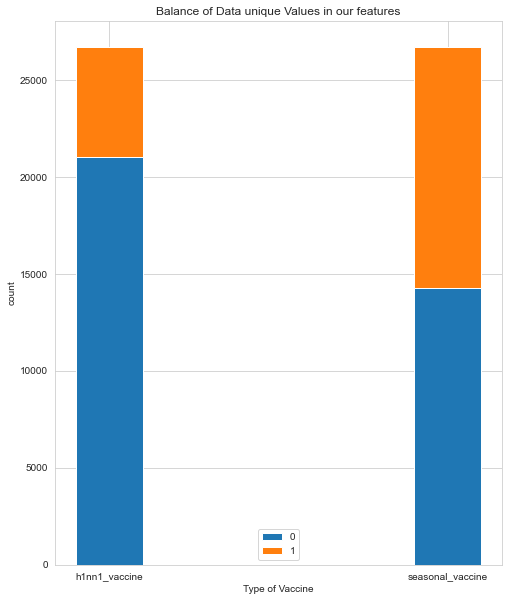

In [476]:
x = ['h1nn1_vaccine', 'seasonal_vaccine']

fig, axes = plt.subplots(figsize=(8, 10), )

zero = [new_df.h1n1_vaccine.value_counts()[0],new_df.seasonal_vaccine.value_counts()[0]]
one= [new_df.h1n1_vaccine.value_counts()[1], new_df.seasonal_vaccine.value_counts()[1]]

plt.bar(x,zero,0.2, label= '0')
plt.bar(x,one,0.2, bottom=zero, label= '1')
plt.legend()

plt.xlabel('Type of Vaccine')
plt.ylabel('count')
plt.title("Balance of Data unique Values in our features")
plt.show()

* From this bar graph, we can see that the *`h1n1 vaccine feature is imbalanced`* compared to the seasonal vaccine data
* Due to the imbalance I choose the *`seasonal vaccine`* as my target feature.

#### `showing population distribution of some of our features`

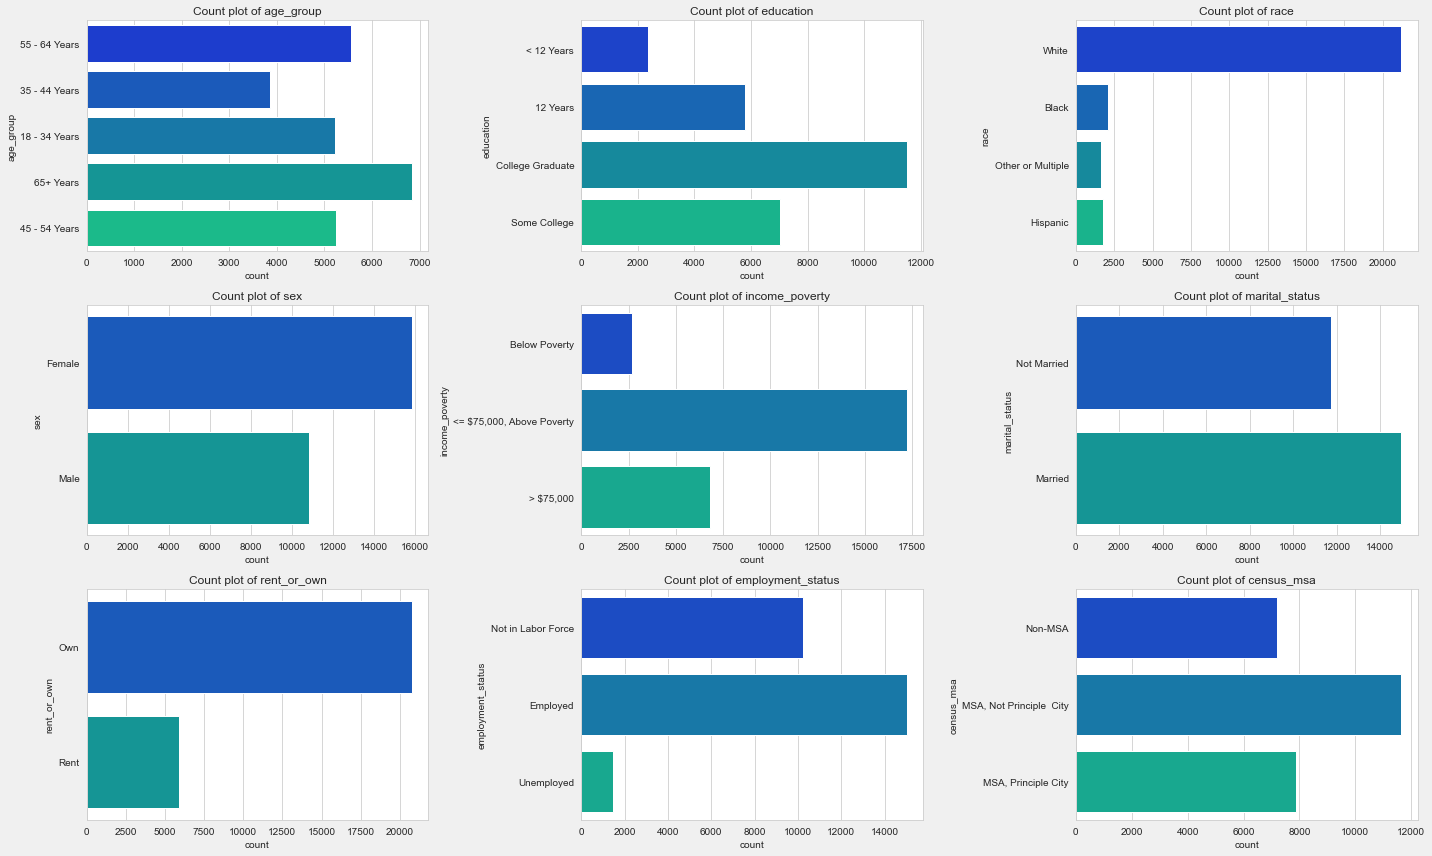

In [477]:
# dropping the columns that will not be used for this visualization

data_cat = data_cat.drop(['employment_industry', 'employment_occupation', 'hhs_geo_region'], axis=1)

#getting the columns for the plot

count_plot = data_cat.columns

# Setting the  size and axes of my visualization

fig, axes = plt.subplots(nrows=3 , ncols=3, figsize=(20, 12))

fig.patch.set_facecolor('#F0F0F0') 

# Iterate over the columns and corresponding axes
for column, ax in zip(count_plot, axes.flatten()):
    sns.countplot(data=data_cat, y=column, ax=ax, linewidth = 1, palette="winter")
    ax.set_title(f'Count plot of {column}')

# plotting the graph

plt.tight_layout()
plt.show()

##### <u>Observations</u>
* *`Age group`*- all age groups above 18 years are well represented in our data set
* *`Education`* - The dataset is largely dominated by college graduates
* *`Race`* - This data set is heavily skewed towards the white race with other races underrepresented
* *`Sex`* - There are more females than males in our dataset but males are not underrepresented by a large margin
* _`income poverty`_ - most of the population lies between poverty line and `75000`
* *`Marital status`* - Both unmarried and married people are well represented
* *`Rent or own`* - Most of the population are home owners and there is an imbalance in that regard
* _`Employment status`_ - Most of the population is either employed or not in labor force


### <span style = 'color : orange' > 2. BI-VARIATE ANALYSIS OF OUR FEATURES </span>


In [478]:

# Create subplots with titles

fig = make_subplots(rows=3, cols=3, subplot_titles=('chronic_med_condition','Race', 'Sex', 'Education', 'Age Group', 'Marital Status', 'Health Worker','Health Insurance', 'doctor_recc_seasonal'))

# Define variables and titles

variables = ['chronic_med_condition','race', 'sex', 'education', 'age_group', 'marital_status', 'health_worker','health_insurance', 'doctor_recc_seasonal']
titles = ['chronic_med_condition','race', 'sex', 'education', 'age_group', 'marital_status', 'health_worker','health_insurance', 'doctor_recc_seasonal']

# Loop through the variables and add violin plots to the subplots

for i, var in enumerate(variables):
    row = (i // 3) + 1
    col = (i % 3) + 1
    fig.add_trace(go.Violin(x=df[var], y=df['seasonal_vaccine'], name=titles[i]), row=row, col=col)

# Update the layout

fig.update_layout(height=1000, width=1000, title_text="Violin Subplots", template="simple_white")

# Show the figure
fig.show()



##### <u>Observations </u>

* *`Doctor_recc_seasonal`* - For those who the h1n1 vaccines ```0```  was not recommended, did not take the seasonal vaccine in large numbers compared to those who the h1n1 vaccines was recommended ```1```. This shows a relationship between the two vaccines.
* *`Health insurance`* - it seems that those without health insurance did not take the seasonal vaccine and in large numbers compared to those with insurance who were evenly spread.
* *`Health worker`* - Most health workers took the seasonal vaccine compared to non health workers whom the majority did not take the vaccine
* *`Marital status`* - For not married population most did have the vaccines but it is evenly distributed at the married class
* *`chronic med condition`*  -  those taking chronic medication had a higher intake of the vaccine than none, and those without chronic illnesses had more not taking the vaccine.


## <span style = 'color : cyan' > FEATURE SELECTION </span>


#### `Getting the best Features for our  models using chi2 `

In [480]:
# Importing necessary modules for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Set the Target and Independent variable

X = new_df.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1) # Independent Variable
y = new_df.seasonal_vaccine # Target Variable

# Apply select K best to extract best features
best_features = SelectKBest(chi2, k=15)
fit = best_features.fit(X, y)

# Create a DataFrame to store the feature scores
scores = pd.DataFrame(fit.scores_)

# Create a DataFrame to store the column names of the independent variables
x_columns = pd.DataFrame(X.columns)

# Concatenate the column names and scores into a single DataFrame
feature_score = pd.concat([x_columns, scores], axis=1)
feature_score.columns = ['feature_data1', 'scores']

In [481]:
# Select the top 20 features with the highest scores

final_features = feature_score.nlargest(20, 'scores')

In [482]:
# Filter the final_features DataFrame based on a score threshold

final_features = final_features[final_features['scores'] > 350]

final_features

feature_data1       scores
19            opinion_seas_risk  2794.888237
10         doctor_recc_seasonal  2421.579654
23                    age_group  1997.217625
33          employment_industry  1669.849661
18  opinion_seas_vacc_effective   991.273021
16            opinion_h1n1_risk   866.169464
9              doctor_recc_h1n1   839.733852
11        chronic_med_condition   557.625394
22           household_children   538.442999
13                health_worker   383.862558

In [484]:
# Create a list of column names to include

columns_to_include = final_features['feature_data1'].tolist()

# Add 'seasonal_vaccine' column to the list of columns to include

columns_to_include.append('seasonal_vaccine')

# Create a new DataFrame with selected columns

final_df = new_df[columns_to_include]

final_df.head()

opinion_seas_risk  doctor_recc_seasonal  age_group  employment_industry  \
0                1.0                   0.0        3.0                  4.0   
1                2.0                   0.0        1.0                 12.0   
2                1.0                   0.0        0.0                 14.0   
3                4.0                   1.0        4.0                  4.0   
4                1.0                   0.0        2.0                 18.0   

   opinion_seas_vacc_effective  opinion_h1n1_risk  doctor_recc_h1n1  \
0                          2.0                1.0               0.0   
1                          4.0                4.0               0.0   
2                          4.0                1.0               0.0   
3                          5.0                3.0               0.0   
4                          3.0                3.0               0.0   

   chronic_med_condition  household_children  health_worker  seasonal_vaccine  
0                    0.0                 0.0            0.0               0.0  
1                    0.0                 0.0            0.0               1.0  
2                    1.0                 0.0            0.0               0.0  
3                    1.0                 0.0            0.0               1.0  
4                    0.0                 0.0            0.0               0.0

## `BASE MODEL`

In [425]:
X = final_df.drop('seasonal_vaccine', axis=1)
Y= final_df['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=0)

We are going to define a few function that will help us with model selection

1. The first function `fit_train_score` helps will train, test and return a few score metrics and confusion report and matrix
   #
2. The second function `learning_curve` will plot a learning curve to evaluate the performance on training and validation sets

Testing time: 0.7340352535247803 seconds
Model Train accuracy: 0.875
Model Test accuracy: 0.729
Cross Validation Accuracy: 72.2584%


*********************************** 

              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75      2855
         1.0       0.72      0.68      0.70      2487

    accuracy                           0.73      5342
   macro avg       0.73      0.73      0.73      5342
weighted avg       0.73      0.73      0.73      5342



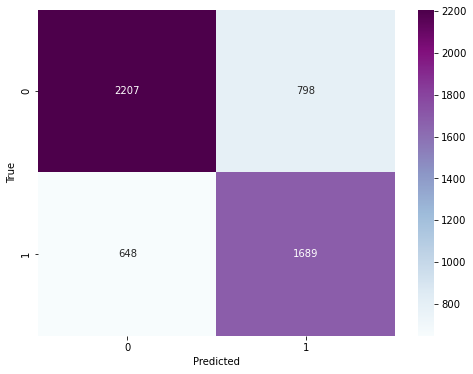

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# setting my pipeline

scaled_pipeline = Pipeline([('scaler' , StandardScaler()),
                            ('tree', DecisionTreeClassifier())])
cv = 10
# setting basic parameter
grid = [{'tree__criterion': ['entropy'], 
         }]

base_decision_tree = GridSearchCV(estimator=scaled_pipeline, 
                          param_grid= grid,
                          scoring='accuracy', 
                          cv=cv)

# training and fitting

def fit_train_score(model):

    start_time = time.time()

    model.fit(X_train,y_train)

    # predicting with X_test

    y_test_pred = model.predict(X_test)

    #accuracy score of the model on the training set.

    y_train_pred = model.predict(X_train)

    # End the timer

    end_time = time.time()

    #accuracy score of the model on the training set.

    accuracy_train = accuracy_score(y_train_pred,y_train)

    # the accuracy score of the model on the test set.

    accuracy_test = accuracy_score(y_test_pred, y_test)

    # performing cross validation
    cross_val = cross_val_score(model,X_train,y_train,cv = cv)

    # Calculate the elapsed time

    elapsed_time = end_time - start_time

    # Calculate the elapsed time

    print(f"Testing time: {elapsed_time} seconds")

    # Printing the scores
    print(f'Model Train accuracy: {accuracy_train:.3f}')
    print(f'Model Test accuracy: {accuracy_test:.3f}')
    print(f"Cross Validation Accuracy: {round(cross_val.mean()*100,4)}%")

    # creating confusion matrix
    from sklearn.metrics import confusion_matrix
    cmatrix = confusion_matrix(y_test,y_test_pred)

    # Making the Confusion Matrix
    plt.figure(figsize=(8, 6))

    cmatrix = confusion_matrix(y_test_pred, y_test)

    ax = sns.heatmap(cmatrix,annot=True, fmt= 'd', cmap = 'BuPu')

     # Add labels to the x and y axes

    ax.set_xlabel('Predicted')

    ax.set_ylabel('True')

    print('\n')

    print ('***********************************', '\n')

    # printing the report

    print(classification_report(y_test, y_test_pred))





fit_train_score(base_decision_tree)

In [ ]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(model):

    # Plotting the learning curve

    # Generate the learning curve using the learning_curve function

    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, scoring='accuracy')

    # Calculate the mean and standard deviation of the training scores

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate the mean and standard deviation of the validation scores

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the training scores and fill the area between the upper and lower bounds

    plt.figure(figsize=(10, 8))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    plt.fill_between(
        train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')

    # Plot the validation scores and fill the area between the upper and lower bounds

    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Validation score')
    plt.fill_between(
        train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
    

    # Set the x-axis label
    

    plt.xlabel('Training examples')

    # Set the y-axis label

    plt.ylabel('Score')

    # Add a legend to the plot

    plt.legend(loc='best')

    # Add a grid to the plot

    plt.grid(True)
    plt.show()


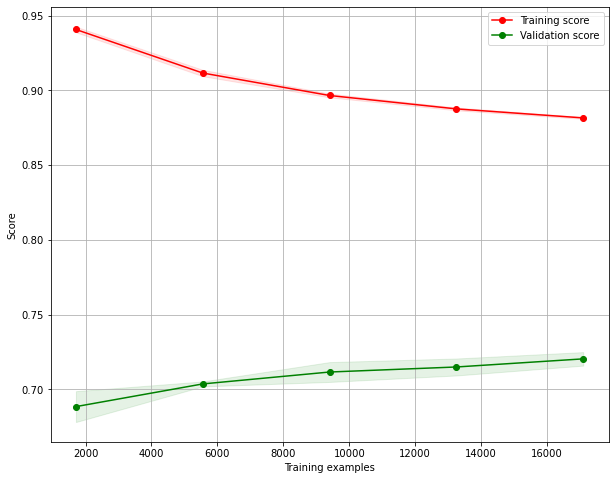

In [ ]:
# plotting the learning curve
plot_learning_curve(base_decision_tree)

### <span style ='color : orange ' > Random Forest Classifier </span>

Testing time: 77.83585524559021 seconds
Model Train accuracy: 0.771
Model Test accuracy: 0.770
Cross Validation Accuracy: 76.6815%


*********************************** 

              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79      2855
         1.0       0.76      0.73      0.75      2487

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



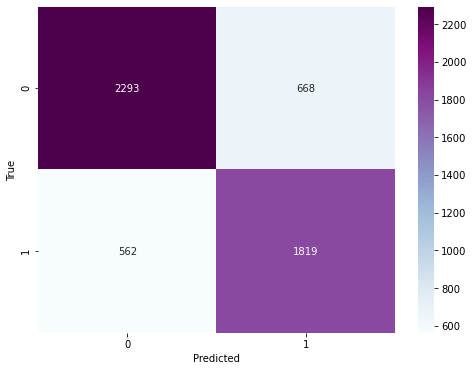

In [ ]:
# importing the necessary library

from sklearn.ensemble import RandomForestClassifier

# defining our pipeline




scaled_pipeline1 = Pipeline([('scaler' , StandardScaler()),
                            ('tree1', RandomForestClassifier()),
                            ])
# setting our cv

cv= 6

# setting basic parameter


grid = [{'tree1__n_estimators' : [10, 30, 100],
         'tree1__criterion': ['gini', 'entropy'],
         'tree1__max_depth': [2,3,4,5,6],
         'tree1__min_samples_split': [len(range(5,10))],
         'tree1__min_samples_leaf': [len(range(5,10))]}]

# Setting up the grid search

gridsearch1 = GridSearchCV(estimator=scaled_pipeline1, 
                          param_grid= grid,
                          scoring='accuracy', 
                          cv=cv)

fit_train_score(gridsearch1)

In [ ]:
# getting the best parameters of the random tree classifier

gridsearch1.best_params_

{'tree1__criterion': 'entropy',
 'tree1__max_depth': 6,
 'tree1__min_samples_leaf': 5,
 'tree1__min_samples_split': 5,
 'tree1__n_estimators': 100}

### <span style ='color : orange ' > Random Forest Classifier with best parameters</span>

Testing time: 9.488755702972412 seconds
Model Train accuracy: 0.771
Model Test accuracy: 0.773
Cross Validation Accuracy: 76.5692%


*********************************** 

              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79      2855
         1.0       0.77      0.73      0.75      2487

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



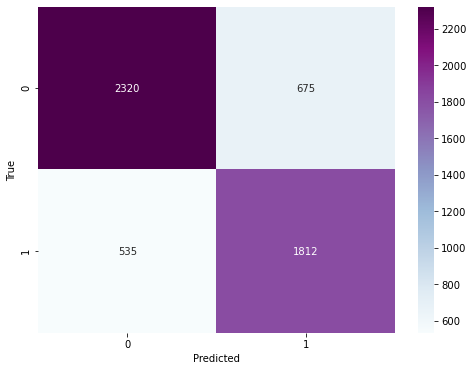

In [ ]:
# setting the best parameters for our random tree classifier

grid = [{'tree1__criterion': ['entropy'],
 'tree1__max_depth': [6],
 'tree1__min_samples_leaf': [5],
 'tree1__min_samples_split': [5],
 'tree1__n_estimators': [100]}]

# setting the cv to 5

cv= 6

# setting the grid search 

random_best = GridSearchCV(estimator=scaled_pipeline1, 
                          param_grid= grid,
                          scoring='accuracy', 
                          cv=cv)

# training and fitting the model

fit_train_score(random_best)

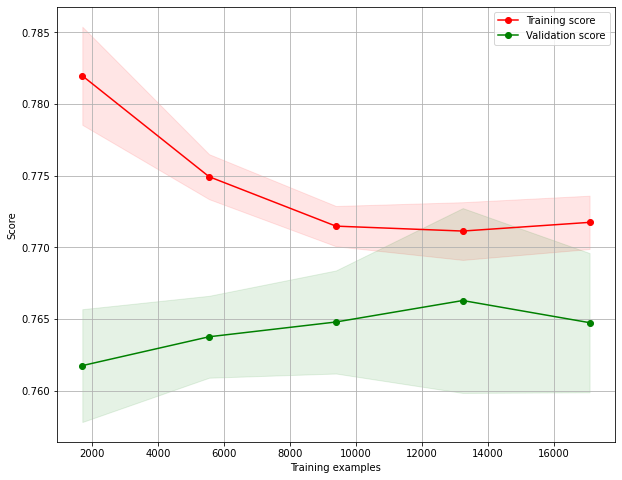

In [ ]:
# plotting the learning curve

plot_learning_curve(random_best)

### <span style ='color : orange ' > Gradient Boosting Classifier</span>

Testing time: 11.203179121017456 seconds
Model Train accuracy: 0.770
Model Test accuracy: 0.773
Cross Validation Accuracy: 76.7657%


*********************************** 

              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79      2855
         1.0       0.77      0.74      0.75      2487

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



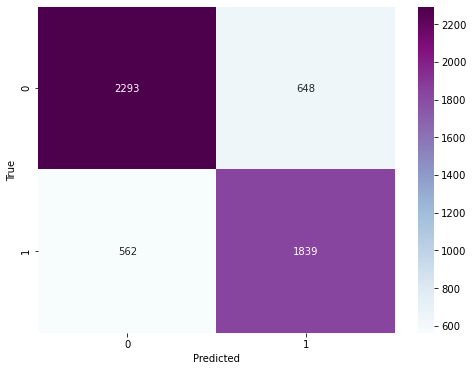

In [ ]:
# importing the required module

from sklearn.ensemble import GradientBoostingClassifier

# initializing the pipeline

scaled_pipeline2 = Pipeline([('scaler' , StandardScaler()),
                            ('gradient', GradientBoostingClassifier())])

cv= 5
# setting basic parameter
grid2 = [{'gradient__loss' : ['log_loss', 'deviance'],
         'gradient__learning_rate': [0.1, 0.2, 0.3],
         'gradient__n_estimators': [len(range(80,100))],}]

gridsearch2 = GridSearchCV(estimator=scaled_pipeline2, 
                          param_grid= grid2,
                          scoring='accuracy', 
                          cv=cv,
                           verbose= False)

fit_train_score(gridsearch2)

In [ ]:
gridsearch2.best_params_

{'gradient__learning_rate': 0.3,
 'gradient__loss': 'log_loss',
 'gradient__n_estimators': 20}

### <span style ='color : orange ' > Gradient Boosting Classifier with best parameters</span>

Testing time: 2.80549693107605 seconds
Model Train accuracy: 0.770
Model Test accuracy: 0.773
Cross Validation Accuracy: 76.8593%


*********************************** 

              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79      2855
         1.0       0.77      0.74      0.75      2487

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



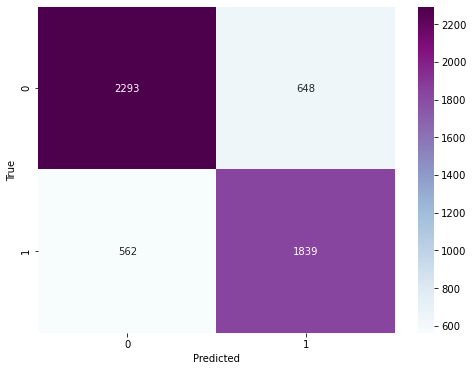

In [ ]:
# setting the cv

cv= 5

# setting best parameters

grid2 = [{'gradient__loss' : ['log_loss'],
         'gradient__learning_rate': [0.3],
         'gradient__n_estimators': [20]}]

# setting the grid search

gradient_best = GridSearchCV(estimator=scaled_pipeline2, 
                          param_grid= grid2,
                          scoring='accuracy', 
                          cv=cv)

# fitting and training the model

fit_train_score(gradient_best)

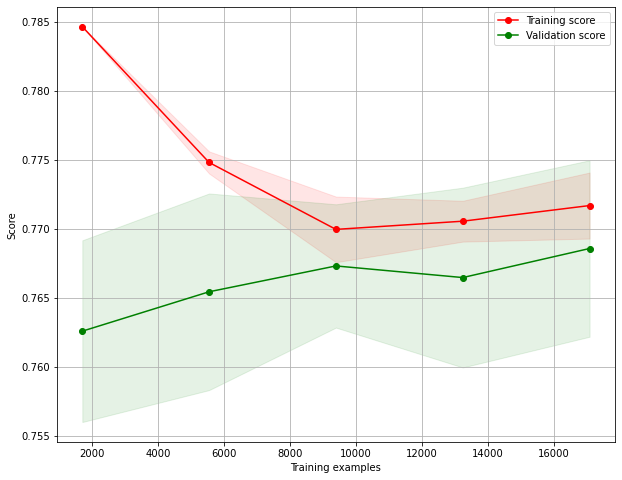

In [ ]:
# plotting the learning curve

plot_learning_curve(gradient_best)

### <span style ='color : orange ' > ADABoost Classifier</span>

Testing time: 9.019234895706177 seconds
Model Train accuracy: 0.764
Model Test accuracy: 0.769
Cross Validation Accuracy: 76.2041%


*********************************** 

              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79      2855
         1.0       0.77      0.72      0.74      2487

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



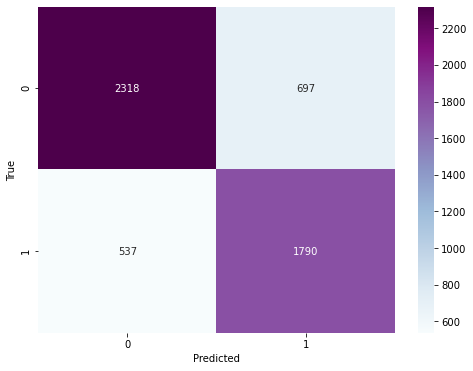

In [ ]:
# ADA BOOSTING

from sklearn.ensemble import AdaBoostClassifier

# setting the pipeline

scaled_pipeline3 = Pipeline([('scaler' , StandardScaler()),
                            ('ADA', AdaBoostClassifier())])

# setting basic parameter
ada = [{'ADA__learning_rate': [0.2, 0.3, 0.4, 0.5],
         'ADA__n_estimators': [len(range(80,95))]}]

adaboost = GridSearchCV(estimator=scaled_pipeline3, 
                          param_grid= ada,
                          scoring='accuracy', 
                          cv=6)

fit_train_score(adaboost)


In [ ]:
adaboost.best_params_

{'ADA__learning_rate': 0.5, 'ADA__n_estimators': 15}

### <span style ='color : orange ' > ADABoost Classifier with best parameters</span>

Testing time: 3.583606243133545 seconds
Model Train accuracy: 0.764
Model Test accuracy: 0.769
Cross Validation Accuracy: 76.2041%


*********************************** 

              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79      2855
         1.0       0.77      0.72      0.74      2487

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



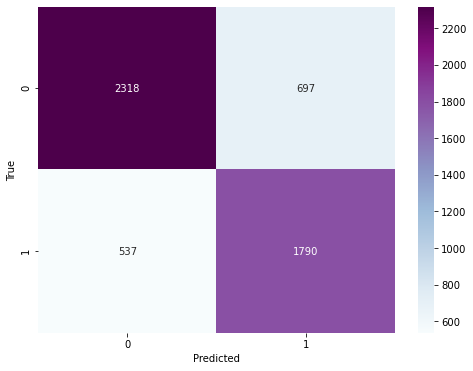

In [ ]:
# setting best parameter

ada2 = [{'ADA__learning_rate': [0.5],
         'ADA__n_estimators': [15]}]

# setting the gridsearch

adaboost_best = GridSearchCV(estimator=scaled_pipeline3, 
                          param_grid= ada2,
                          scoring='accuracy', 
                          cv=6)

fit_train_score(adaboost_best)

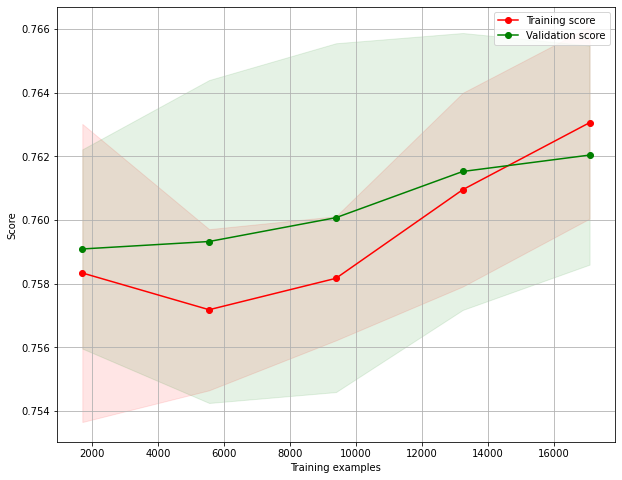

In [ ]:
# plotting the learning curve

plot_learning_curve(adaboost_best)

### <span style ='color : orange ' > XGBoost Classifier</span>

Testing time: 168.79218816757202 seconds
Model Train accuracy: 0.766
Model Test accuracy: 0.772
Cross Validation Accuracy: 76.0965%


*********************************** 

              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79      2855
         1.0       0.78      0.72      0.75      2487

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



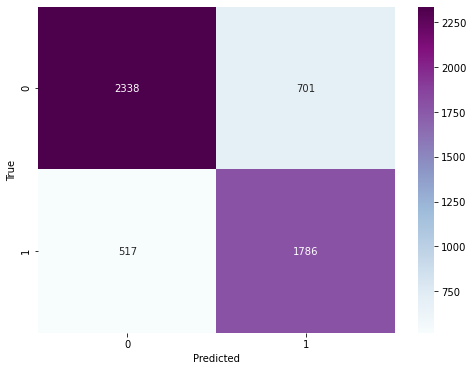

In [ ]:

# setting up the pipeline

scaled_pipeline4 = Pipeline([('scaler', StandardScaler()), ('xgb', XGBClassifier())])

# Setting up the parameter grid for a grid search:

xgb = [{'xgb__eta': [0.1, 0.2, 0.3],
         'xgb__gamma': [49, 50],
         'xgb__max_depth': [5],
         'xgb__subsample': [0.1, 0.2, 0.3],
         'xgb__booster': ['gbtree'],
         'xgb__learning_rate': [0.1, 0.2]}]

# Performing grid search cross-validation:

xgboost1 = GridSearchCV(estimator=scaled_pipeline4, param_grid=xgb, scoring='accuracy', cv=5, verbose=False )

# Fitting the training data and scoring the model:
fit_train_score(xgboost1)

In [ ]:
# getting the best parameters

xgboost1.best_params_

{'xgb__booster': 'gbtree',
 'xgb__eta': 0.1,
 'xgb__gamma': 49,
 'xgb__learning_rate': 0.1,
 'xgb__max_depth': 5,
 'xgb__subsample': 0.3}

### <span style ='color : orange ' > XGBoost Classifier with best parameters </span>

Testing time: 8.582823753356934 seconds
Model Train accuracy: 0.766
Model Test accuracy: 0.772
Cross Validation Accuracy: 76.1667%


*********************************** 

              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79      2855
         1.0       0.78      0.72      0.75      2487

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



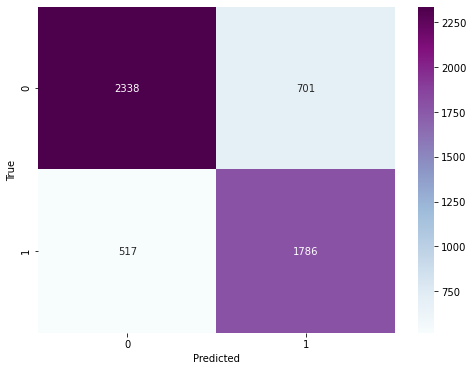

In [ ]:
# Setting up the parameter grid 

xgb1 = [{'xgb__booster': ['gbtree'],
 'xgb__eta': [0.1],
 'xgb__gamma': [49],
 'xgb__learning_rate': [0.1],
 'xgb__max_depth': [5],
 'xgb__subsample': [0.3]}]

# Performing grid search

xgboost1_best = GridSearchCV(estimator=scaled_pipeline4, param_grid=xgb1, scoring='accuracy', cv=6)

# Fitting the training data and scoring the model:
fit_train_score(xgboost1_best)

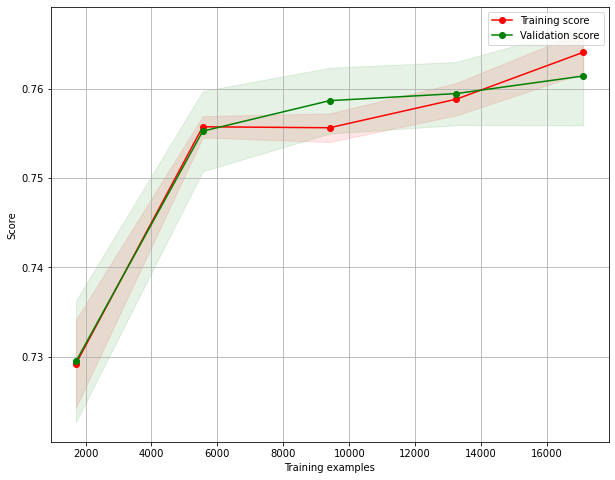

In [ ]:
# plotting the learning curve

plot_learning_curve(xgboost1_best)

### <span style ='color : orange ' > CATBoost Classifier </span>

Testing time: 52.65200138092041 seconds
Model Train accuracy: 0.781
Model Test accuracy: 0.777
Cross Validation Accuracy: 77.1542%


*********************************** 

              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79      2855
         1.0       0.77      0.74      0.76      2487

    accuracy                           0.78      5342
   macro avg       0.78      0.77      0.78      5342
weighted avg       0.78      0.78      0.78      5342



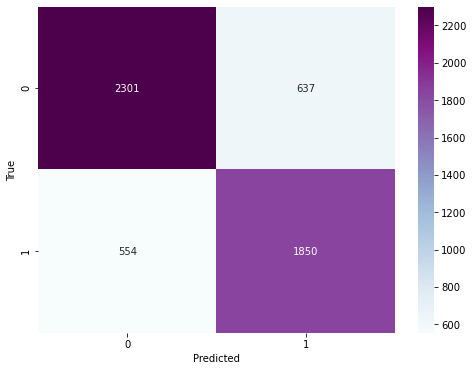

In [ ]:
# importing the necessary libraries

from catboost import CatBoostClassifier

# setting up the pipeline

scaled_pipeline5 = Pipeline([('scaler', StandardScaler()), 
                             ('cat', CatBoostClassifier(verbose=False))])

# setting up the grid parameters

cat1 = [{'cat__n_estimators':[len(range(10,100))],
        'cat__eta': [0.1, 0.2, 0.3, 0.4],
        'cat__max_depth': [5, 6],
        'cat__bootstrap_type': ['Bayesian', 'Bernoulli']}]

# setting up the grid search

cat1_grid = GridSearchCV(estimator=scaled_pipeline5, param_grid= cat1, scoring='accuracy', cv=6, verbose= False) 

# training and testing

fit_train_score(cat1_grid)



In [ ]:
cat1_grid.best_params_

{'cat__bootstrap_type': 'Bernoulli',
 'cat__eta': 0.2,
 'cat__max_depth': 5,
 'cat__n_estimators': 90}

### <span style ='color : orange ' > CATBoost Classifier with best parameters</span>

Testing time: 4.157091379165649 seconds
Model Train accuracy: 0.781
Model Test accuracy: 0.777
Cross Validation Accuracy: 77.2104%


*********************************** 

              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79      2855
         1.0       0.77      0.74      0.76      2487

    accuracy                           0.78      5342
   macro avg       0.78      0.77      0.78      5342
weighted avg       0.78      0.78      0.78      5342



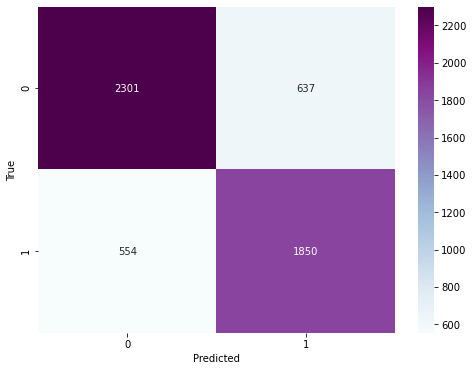

In [ ]:
# setting up the grid parameters

cat1 = [{'cat__n_estimators':[90],
        'cat__eta': [0.2],
        'cat__max_depth': [5],
        'cat__bootstrap_type': ['Bernoulli']}]

# setting up the grid search

cat1_grid_best = GridSearchCV(estimator=scaled_pipeline5, param_grid= cat1, scoring='accuracy', cv=6, verbose= False) 

# training and testing

fit_train_score(cat1_grid_best)

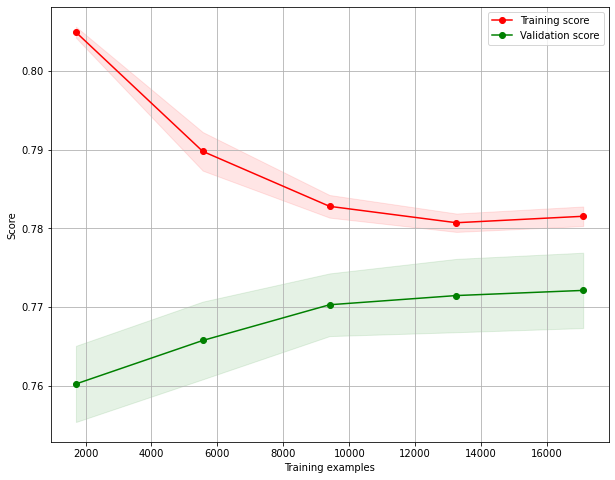

In [ ]:
# plotting the learning curve

plot_learning_curve(cat1_grid_best)

In [432]:


# Define the data and columns
data = np.array([
    ['Decision_tree', 0.997, 0.682, 0.681],
    ['Random_forest', 0.776, 0.776, 0.769],
    ['Gradient_boosting', 0.78, 0.776, 0.777],
    ['AdaBoosting', 0.767, 0.773, 0.766],
    ['XGBoost', 0.77, 0.776, 0.769],
    ['CATBoost', 0.799, 0.786, 0.780]
])

scores_df1 = pd.DataFrame(data)
scores_df1.columns = ['Model', 'Model_Train_Accuracy', 'Model_Test_Accuracy', 'Cross_Validation_Accuracy']
scores_df1 = scores_df1.sort_values(by='Model_Test_Accuracy', ascending=False)
scores_df1


Model Model_Train_Accuracy Model_Test_Accuracy  \
5           CATBoost                0.799               0.786   
1      Random_forest                0.776               0.776   
2  Gradient_boosting                 0.78               0.776   
4            XGBoost                 0.77               0.776   
3        AdaBoosting                0.767               0.773   
0      Decision_tree                0.997               0.682   

  Cross_Validation_Accuracy  
5                      0.78  
1                     0.769  
2                     0.777  
4                     0.769  
3                     0.766  
0                     0.681

The elapsed time of 17 seconds for your model's prediction can be interpreted as the time taken by the model to process the given input data and generate predictions. This time includes any preprocessing, feature extraction, and computation performed by the model during the prediction step.

The interpretation of the elapsed time depends on the specific requirements and context of your deployment scenario. Here are a few aspects to consider:

1. Performance: The elapsed time can give you an indication of the computational efficiency of your model. If the prediction time is too long, it may affect the real-time responsiveness of your application or system. In such cases, you might need to optimize your model or explore alternatives to meet the performance requirements.

2. Scaling: The elapsed time can help you estimate the scalability of your model. If the prediction time is acceptable for the current workload, you can assess how the model performs when deployed in a production environment with potentially higher traffic or larger datasets.

3. User Experience: The elapsed time can impact the user experience of your application. If the prediction time is too long, it may lead to delays or perceived sluggishness. Understanding the elapsed time can help you set appropriate expectations and provide feedback to the users.

4. Model Complexity: The elapsed time can be influenced by the complexity of your model, the size of the input data, and the available computational resources. If your model has a large number of parameters or complex computations, it may result in longer prediction times. In such cases, you can explore techniques like model compression or hardware acceleration to improve the prediction speed.

It's important to note that the interpretation of the elapsed time should be evaluated in the specific context of your application and deployment requirements. You can compare the elapsed time with your performance targets or benchmarks to determine whether it meets your desired criteria.

Additionally, it is recommended to perform benchmarking and testing on representative datasets and monitor the system's performance over time to ensure it meets the required performance standards.